# Features exploration

All features given are numerical (including but not limited to boolean)

In [1]:
import pandas as pd


trainDf = pd.read_csv('train.csv')
trainDf.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'output'],
      dtype='object')

## Numerical data (Not including boolean)

- BMI
- GenHlth
- MentHlth
- PhysHlth
- Age
- Education
- Income

In [2]:
trainDf.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,output
count,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,...,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000
mean,0.513883,0.493653,0.972035,29.447441,0.473225,0.050377,0.133082,0.728877,0.616025,0.801666,...,0.085879,2.702102,3.617017,5.195954,0.207061,0.447441,8.376041,4.958548,5.852836,0.356010
std,0.499857,0.500009,0.164889,7.080019,0.499332,0.218743,0.339697,0.444583,0.486400,0.398785,...,0.280213,1.106379,7.997166,9.538762,0.405240,0.497279,2.920253,1.018217,2.131317,0.478866
min,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000,0.000000
50%,1.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000,0.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,5.000000,0.000000,1.000000,10.000000,6.000000,8.000000,1.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


array([[<Axes: title={'center': 'BMI'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Income'}>, <Axes: >, <Axes: >]],
      dtype=object)

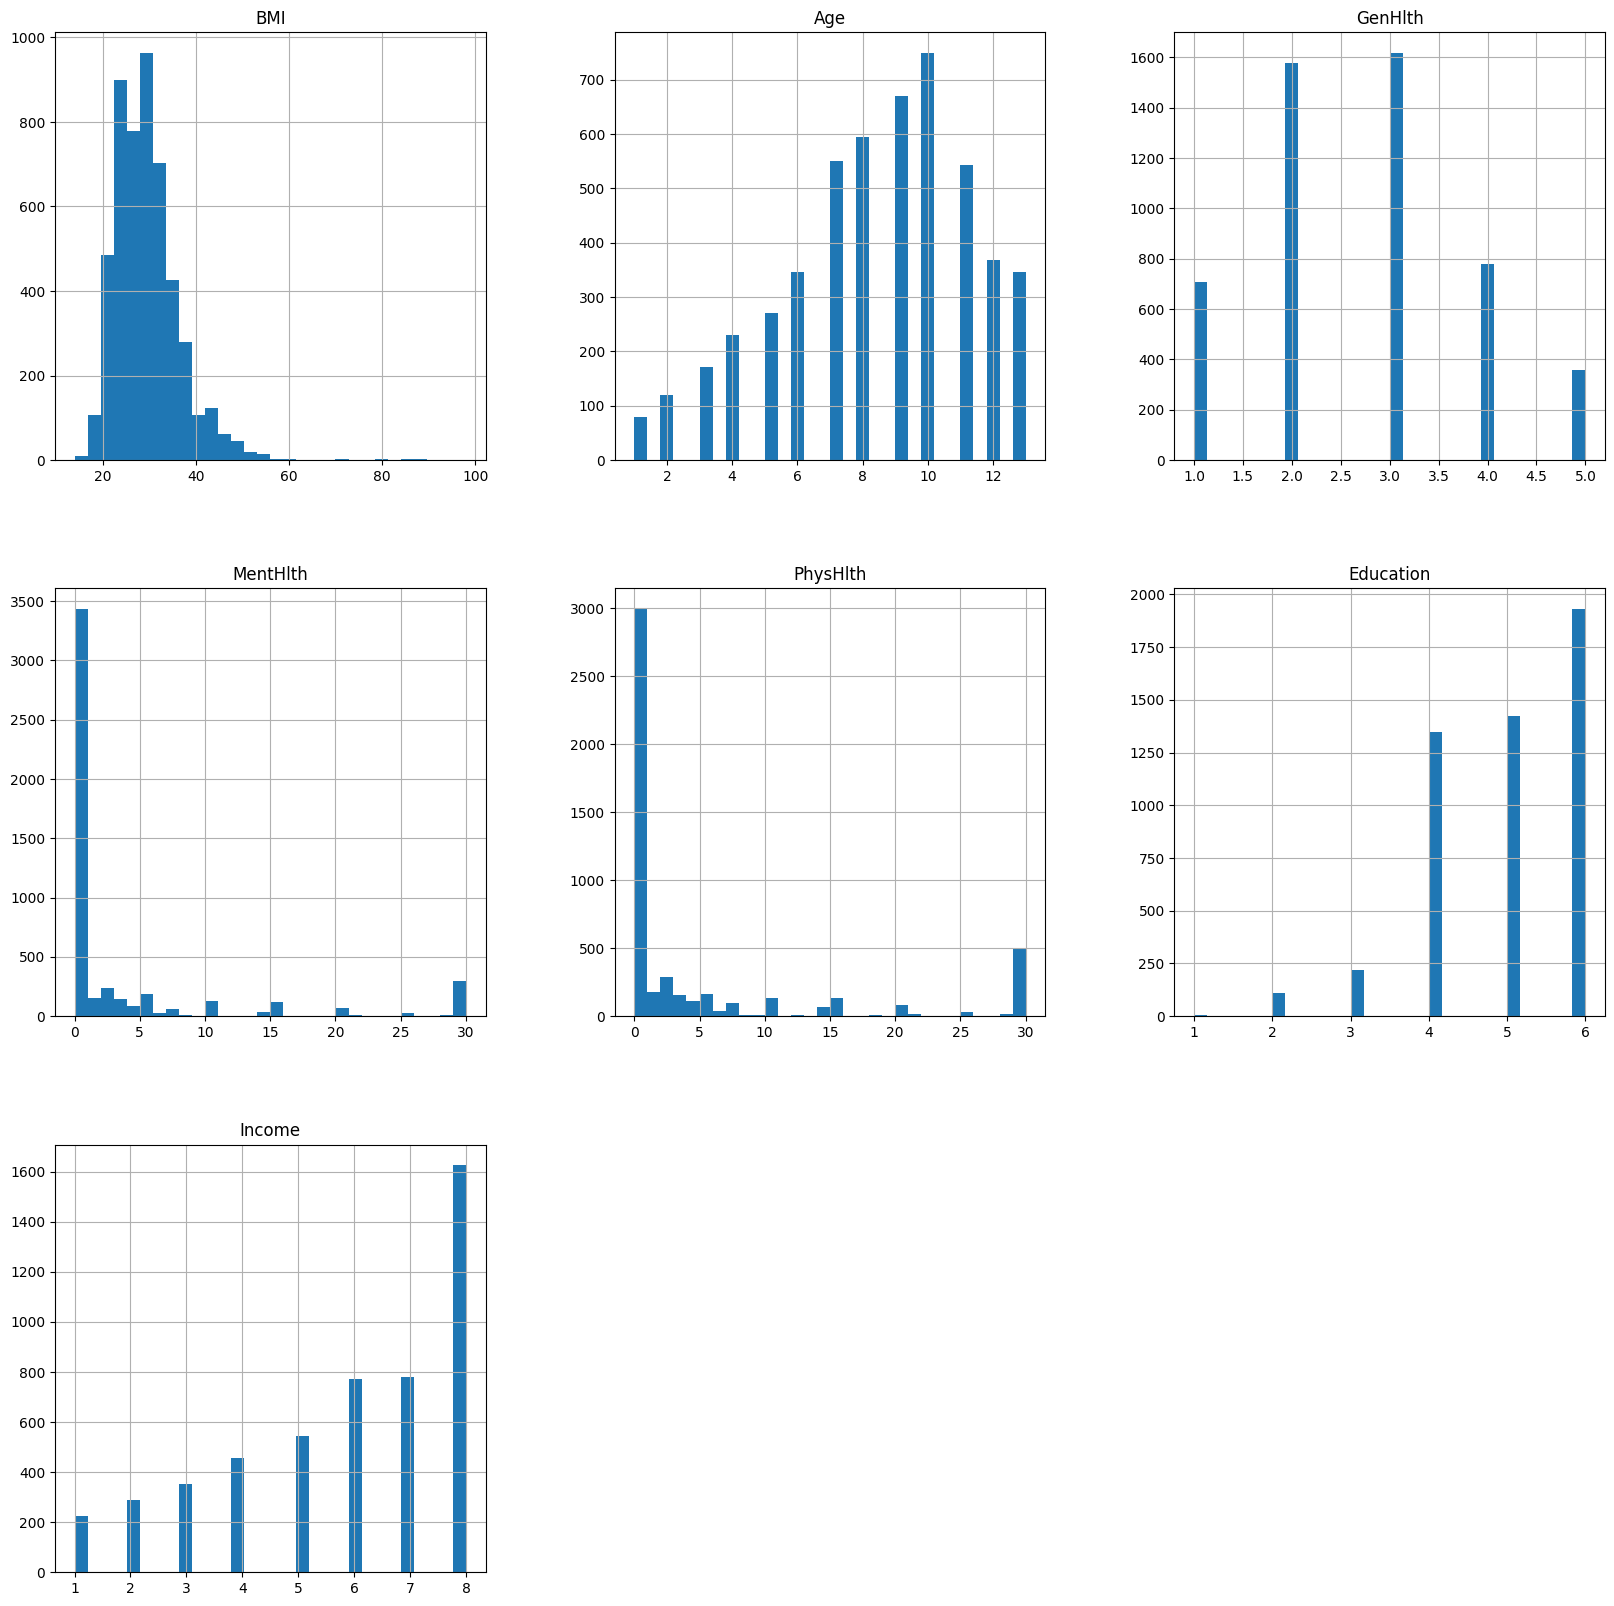

In [3]:
CONTINUOUS_FEATURES = ["BMI", "Age"]
ORDINAL_FEATURES = ["GenHlth", "MentHlth", "PhysHlth", "Education", "Income"]

trainDf.hist(column=CONTINUOUS_FEATURES+ORDINAL_FEATURES, bins=30, figsize=(20, 20))

In [4]:
BOOLEAN_FEATURES = [
    col
    for col in trainDf.columns
    if col not in CONTINUOUS_FEATURES
    and col not in ORDINAL_FEATURES
    and col != "output"
]

print(f"Number of numerical features: {len(CONTINUOUS_FEATURES) + len(ORDINAL_FEATURES)}")
print(f"Number of boolean features: {len(BOOLEAN_FEATURES)}")

Number of numerical features: 7
Number of boolean features: 14


# Normalize data

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


stdScaler = StandardScaler()
trainDf[CONTINUOUS_FEATURES] = stdScaler.fit_transform(trainDf[CONTINUOUS_FEATURES])

minMaxScaler = MinMaxScaler()
trainDf[ORDINAL_FEATURES] = minMaxScaler.fit_transform(trainDf[ORDINAL_FEATURES])

trainDf.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,output
count,5042.000000,5042.000000,5042.000000,5.042000e+03,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,...,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5.042000e+03,5042.000000,5042.000000,5042.000000
mean,0.513883,0.493653,0.972035,-2.113872e-16,0.473225,0.050377,0.133082,0.728877,0.616025,0.801666,...,0.085879,0.425526,0.120567,0.173198,0.207061,0.447441,-5.214217e-17,0.791710,0.693262,0.356010
std,0.499857,0.500009,0.164889,1.000099e+00,0.499332,0.218743,0.339697,0.444583,0.486400,0.398785,...,0.280213,0.276595,0.266572,0.317959,0.405240,0.497279,1.000099e+00,0.203643,0.304474,0.478866
min,0.000000,0.000000,0.000000,-2.182052e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.526073e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,-6.282303e-01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,-4.712529e-01,0.600000,0.428571,0.000000
50%,1.000000,0.000000,1.000000,-2.044606e-01,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,2.136872e-01,0.800000,0.714286,0.000000
75%,1.000000,1.000000,1.000000,5.018222e-01,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.500000,0.066667,0.166667,0.000000,1.000000,5.561573e-01,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,9.683498e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.583567e+00,1.000000,1.000000,1.000000


# Grammatical Evolution

In [6]:
# switch directory to use grape
%cd ../grape

# import grape and necessary functions
import grape
from algorithms import ge_eaSimpleWithElitism
from functions import pdiv


# switch back to the original directory
%cd -

/home/tu/code-py/evolutionary-computation/grape
/home/tu/code-py/evolutionary-computation/mid-project


## Parameters 

In [7]:
import random 


RANDOM_SEED = 1
random.seed(RANDOM_SEED)

POPULATION_SIZE = 1000
MAX_GENERATIONS = 200
P_CROSSOVER = 0.8
P_MUTATION = 0.01
HALLOFFAME_SIZE = max(round(0.01 * POPULATION_SIZE), 1)  # it should be at least 1
ELITE_SIZE = min(round(0.01 * POPULATION_SIZE), HALLOFFAME_SIZE)

CODON_CONSUMPTION = "lazy"
GENOME_REPRESENTATION = "list"
MAX_GENOME_LENGTH = None

MAX_INIT_TREE_DEPTH = 17
MIN_INIT_TREE_DEPTH = 5
MAX_TREE_DEPTH = 90
MAX_WRAPS = 0
CODON_SIZE = 255

REPORT_ITEMS = [
    "gen",
    "invalid",
    "avg",
    "std",
    "min",
    "max",
    "fitness_test",
    "best_ind_length",
    "avg_length",
    "best_ind_nodes",
    "avg_nodes",
    "best_ind_depth",
    "avg_depth",
    "avg_used_codons",
    "best_ind_used_codons",
    "selection_time",
    "generation_time",
]

## Gramma

In [8]:
grammar = grape.Grammar("./gramma.bnf")
grammar.production_rules

[[['add(<number_value>, <number_value>)', 'non-terminal', 2, 0, True, 3],
  ['sub(<number_value>, <number_value>)', 'non-terminal', 2, 1, True, 3],
  ['mul(<number_value>, <number_value>)', 'non-terminal', 2, 2, True, 3],
  ['div(<number_value>, <number_value>)', 'non-terminal', 2, 3, True, 3],
  ['abs(<number_value>)', 'non-terminal', 1, 4, True, 3],
  ['sigmoid(<number_value>)', 'non-terminal', 1, 5, True, 3],
  ['tanh(<number_value>)', 'non-terminal', 1, 6, True, 3],
  ['relu(<number_value>)', 'non-terminal', 1, 7, True, 3],
  ['swish(<number_value>)', 'non-terminal', 1, 8, True, 3],
  ['np.where((<logic_op>), (<number_value>), (<number_value>))',
   'non-terminal',
   3,
   9,
   True,
   3]],
 [['<compare_op>', 'non-terminal', 1, 0, True, 4],
  ['and_(<logic_op>, <logic_op>)', 'non-terminal', 2, 1, True, 3],
  ['or_(<logic_op>, <logic_op>)', 'non-terminal', 2, 2, True, 3],
  ['xor(<logic_op>, <logic_op>)', 'non-terminal', 2, 3, True, 3],
  ['not_(<logic_op>)', 'non-terminal', 1, 4

## Fitness function 

### Predict fitness

In [9]:
import numpy as np


# logic op
def and_(a, b):
    return np.logical_and(a, b)
def or_(a, b):
    return np.logical_or(a, b)
def xor(a, b):
    return np.logical_xor(a, b)
def not_(a):
    return np.logical_not(a)

# compare op
def greater_than(a, b):
    return (a > b)
def less_than(a, b):
    return (a < b)
def in_range(a, b, c):
    return np.logical_and(a > b, a < c)

# number op
def add(a, b):
    return (a + b)
def sub(a, b):
    return (a - b)
def mul(a, b):
    return (a * b)
def div(a, b):
    return pdiv(a, b)
def abs(a):
    return np.abs(a)
def sigmoid(a):
    return 1 / (1 + np.exp(-a))
def tanh(a):
    return np.tanh(a)
def relu(a):
    return np.maximum(0, a)
def swish(a):
    return a * sigmoid(a)


class GE_ExecuteError(Exception):
    # take a message as input
    def __init__(self, message="Error during the execution of the individual"):
        self.message = message
        super().__init__(self.message)
    pass

def gePredictProba(individual, nf, bf, training=False):
    """Predict if a case is positive or negative using ge and the individual.

    Args:
        individual (_type_): a valid GE individual
        nf (_type_): numerical features
        bf (_type_): boolean features

    Raises:
        GE_ExecuteError: if error happens during the execution of the individual

    Returns:
        float: the probability of the case being positive [0, 1]
    """

    nf = np.array(nf)
    bf = np.array(bf)

    assert nf.ndim == bf.ndim, "Numerical and Boolean data must have the same number of dimensions"

    # execute
    try:
        if nf.ndim == 1:
            activation = eval(individual.phenotype)
            return sigmoid(activation)

        if nf.ndim == 2:
            assert nf.shape[0] == bf.shape[0], "Numerical and Boolean data must have the same number of samples"

            nf = nf.T
            bf = bf.T

            activations = eval(individual.phenotype)

            # mix-max scaling to sigmoid limits
            if training:
                pos_mask = activations > 0
                neg_mask = ~pos_mask

                activationsScaled = np.zeros_like(activations)
                if len(set(activations[pos_mask])) >= 2:
                    scaleFactor = 5 / activations[pos_mask].max()
                    pos_scaled = activations[pos_mask] * scaleFactor
                    activationsScaled[pos_mask] = pos_scaled
                if len(set(activations[neg_mask])) >= 2:
                    scaleFactor = 5 / -activations[neg_mask].min()
                    neg_scaled = activations[neg_mask] * scaleFactor
                    activationsScaled[neg_mask] = neg_scaled

            proba = sigmoid(activations)
            return proba

        raise NotImplementedError("Data with more than 2 dimensions is not supported")

    except (
        FloatingPointError,
        ZeroDivisionError,
        OverflowError,
        MemoryError,
        IndexError,
        TypeError,
    ) as e:
        raise GE_ExecuteError(str(e))

def gePredict(individual, nf, bf):
    proba = gePredictProba(individual, nf, bf)
    return np.round(proba).astype(int)


def errorRateFitness(individual, x, Y) -> float:
    nf = x[CONTINUOUS_FEATURES + ORDINAL_FEATURES].to_numpy()
    bf = x[BOOLEAN_FEATURES].to_numpy()

    proba = gePredictProba(individual, nf, bf, training=True)

    mse = np.mean((Y - proba) ** 2)

    # bce = -np.mean(Y * np.log(proba) + (1 - Y) * np.log(1 - proba))

    return mse

### Number of features used fitness

In [10]:
def featUsedFitness(individual, x, k_feat = 0.7):
    featUsed = 0
    for i in range(len(CONTINUOUS_FEATURES) + len(ORDINAL_FEATURES)):
        if f"nf[{i}]" in individual.phenotype:
            featUsed += 1
    for i in range(len(BOOLEAN_FEATURES)):
        if f"bf[{i}]" in individual.phenotype:
            featUsed += 1

    return 1 / (1 + np.exp(-k_feat * featUsed))


def reverseFeatUsedSigmoid(featUsedFitness, k_feat = 0.7):
    
    if featUsedFitness == 0:
        return 21  # used almost all features

    return -np.log(1 / featUsedFitness - 1) / k_feat


def accuracyFitness(individual, x, Y) -> float:
    nf = x[CONTINUOUS_FEATURES + ORDINAL_FEATURES].to_numpy()
    bf = x[BOOLEAN_FEATURES].to_numpy()

    pred = gePredict(individual, nf, bf)

    acc = np.mean(Y == pred)

    return acc

## Accuracy

In [11]:


def accuracyFitness(individual, x, Y) -> float:
    nf = x[CONTINUOUS_FEATURES + ORDINAL_FEATURES].to_numpy()
    bf = x[BOOLEAN_FEATURES].to_numpy()

    pred = gePredict(individual, nf, bf)

    acc = np.mean(Y == pred)

    return acc

### Combined fitness

In [12]:

def fitness(individual, points, k_feat = 0.7) -> tuple:
    FITNESS_SIZE = 2
    
    INVALID = tuple([np.nan] * FITNESS_SIZE)

    if individual.invalid:
        return INVALID

    x, Y = points

    # features used
    featFitness = featUsedFitness(individual, x, k_feat)

    # error rate (mse)
    try:
        errRate = errorRateFitness(individual, x, Y)
    except GE_ExecuteError:
        return INVALID

    # accuracy = accuracyFitness(individual, x, Y)
    
    # activation regularization
    

    return (errRate, featFitness)

## Train

### Toolbox

In [13]:
from deap import creator, base, tools


MSE_WEIGHT = -1  # minimize
FEAT_USED_WEIGHT = 0.05  # maximize

SIGMOID_K = 0.7


toolbox = base.Toolbox()

creator.create("Fitness", base.Fitness, weights=(
    MSE_WEIGHT, 
    FEAT_USED_WEIGHT
))
creator.create("Individual", grape.Individual, fitness=creator.Fitness)

toolbox.register("populationCreator", grape.sensible_initialisation, creator.Individual)
toolbox.register("evaluate", fitness, k_feat=SIGMOID_K)
toolbox.register("select", tools.selTournament, tournsize=7)  # nsga2
toolbox.register("mate", grape.crossover_onepoint)
toolbox.register("mutate", grape.mutation_int_flip_per_codon)

toolbox.register("reverseFeatSigmoid", reverseFeatUsedSigmoid, k_feat=SIGMOID_K)

### Data

In [14]:
# train data
X_train = trainDf.drop(columns=["output"])
y_train = trainDf["output"].to_numpy()

In [15]:
# population and hall of fame:
from collections import Counter


def individualEq(ind1, ind2):
    return ind1.phenotype == ind2.phenotype


population = toolbox.populationCreator(
    pop_size=POPULATION_SIZE,
    bnf_grammar=grammar,
    min_init_depth=MIN_INIT_TREE_DEPTH,
    max_init_depth=MAX_INIT_TREE_DEPTH,
    codon_size=CODON_SIZE,
    codon_consumption=CODON_CONSUMPTION,
    genome_representation=GENOME_REPRESENTATION,
)

# prepare the statistics object:
stats_err_rate = tools.Statistics(lambda ind: ind.fitness.values[0])
stats_feat_used = tools.Statistics(lambda ind: toolbox.reverseFeatSigmoid(ind.fitness.values[1]))

stats = tools.MultiStatistics(errRate=stats_err_rate, featUsed=stats_feat_used)
stats.register("avg", np.nanmean)
stats.register("std", np.nanstd)
stats.register("min", np.nanmin)
stats.register("max", np.nanmax)


hof = tools.HallOfFame(HALLOFFAME_SIZE)
logbooks = []

STEPS = 100
MAX_GENERATIONS = 200
mainHOF = tools.HallOfFame(HALLOFFAME_SIZE, similar=individualEq)
for i in range(0, MAX_GENERATIONS, STEPS):
    print(f"Generations {i} / {MAX_GENERATIONS}")

    if i > 0:
        # reset the hall of fame if the most common phenotype is more than half
        counter = Counter()
        for ind in hof:
            counter[ind.phenotype] += 1
        mostCommonPhenotype = counter.most_common(1)[0][1]
        if mostCommonPhenotype >= HALLOFFAME_SIZE / 2:
            print(f"Too many similar phenotypes in the hall of fame {mostCommonPhenotype}. Resetting...")

            # retain best non duplicated individuals
            mainHOF.update(hof.items)
            mainHOF.update(population)

            hof = tools.HallOfFame(HALLOFFAME_SIZE)
            hof.update(mainHOF.items)
        else:
            print(f"Hall of fame is diverse. Worse duplication is {mostCommonPhenotype}. Continue training...")

    # run the algorithm:
    population, logbook = ge_eaSimpleWithElitism(
        population,
        toolbox,
        cxpb=P_CROSSOVER,
        mutpb=P_MUTATION,
        ngen=STEPS,
        elite_size=ELITE_SIZE,
        bnf_grammar=grammar,
        codon_size=CODON_SIZE,
        max_tree_depth=MAX_TREE_DEPTH,
        max_genome_length=MAX_GENOME_LENGTH,
        points_train=[X_train, y_train],
        # points_test=[X_test, y_test],
        codon_consumption=CODON_CONSUMPTION,
        report_items=REPORT_ITEMS,
        genome_representation=GENOME_REPRESENTATION,
        stats=stats,
        halloffame=hof,
        verbose=False,
    )

    logbooks.append(logbook)

Generations 0 / 200


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:124: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid them.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid them.")


gen = 0 , Best fitness = (np.float64(0.20762338497516478), np.float64(0.8021838885585817))


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 1 , Best fitness = (np.float64(0.20762338497516478), np.float64(0.8021838885585817)) , Number of invalids = 326


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 2 , Best fitness = (np.float64(0.2061440962277539), np.float64(0.9426758241011313)) , Number of invalids = 235


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 3 , Best fitness = (np.float64(0.20040396742517658), np.float64(0.8021838885585817)) , Number of invalids = 217


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 4 , Best fitness = (np.float64(0.20040396742517658), np.float64(0.8021838885585817)) , Number of invalids = 235


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 5 , Best fitness = (np.float64(0.20037568977182724), np.float64(0.8021838885585817)) , Number of invalids = 206


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 6 , Best fitness = (np.float64(0.20025185006792434), np.float64(0.9706877692486438)) , Number of invalids = 181


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 7 , Best fitness = (np.float64(0.19968593843452392), np.float64(0.8909031788043871)) , Number of invalids = 144


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 8 , Best fitness = (np.float64(0.19968489126793154), np.float64(0.8909031788043871)) , Number of invalids = 72


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 9 , Best fitness = (np.float64(0.19968489126793154), np.float64(0.8909031788043871)) , Number of invalids = 83


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 10 , Best fitness = (np.float64(0.19968489126793154), np.float64(0.8909031788043871)) , Number of invalids = 63


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 11 , Best fitness = (np.float64(0.19738536709100288), np.float64(0.8909031788043871)) , Number of invalids = 58


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 12 , Best fitness = (np.float64(0.19738536709100288), np.float64(0.8909031788043871)) , Number of invalids = 57


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 13 , Best fitness = (np.float64(0.19738536709100288), np.float64(0.8909031788043871)) , Number of invalids = 63


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 14 , Best fitness = (np.float64(0.195632088069358), np.float64(0.8909031788043871)) , Number of invalids = 56


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 15 , Best fitness = (np.float64(0.195632088069358), np.float64(0.8909031788043871)) , Number of invalids = 59


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 16 , Best fitness = (np.float64(0.19453285480356364), np.float64(0.9852259683067269)) , Number of invalids = 33


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 17 , Best fitness = (np.float64(0.19093751034543596), np.float64(0.9426758241011313)) , Number of invalids = 19


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 18 , Best fitness = (np.float64(0.19093751034543596), np.float64(0.9426758241011313)) , Number of invalids = 10


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 19 , Best fitness = (np.float64(0.19093751034543596), np.float64(0.9426758241011313)) , Number of invalids = 4


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 20 , Best fitness = (np.float64(0.19093751034543596), np.float64(0.9426758241011313)) , Number of invalids = 3


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 21 , Best fitness = (np.float64(0.19093751034543596), np.float64(0.9426758241011313)) , Number of invalids = 7


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 22 , Best fitness = (np.float64(0.19093751034543596), np.float64(0.9426758241011313)) , Number of invalids = 7


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 23 , Best fitness = (np.float64(0.1897536073203524), np.float64(0.9706877692486438)) , Number of invalids = 6


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 24 , Best fitness = (np.float64(0.18902931693849304), np.float64(0.9426758241011313)) , Number of invalids = 6


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 25 , Best fitness = (np.float64(0.18902931693849304), np.float64(0.9426758241011313)) , Number of invalids = 7


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 26 , Best fitness = (np.float64(0.18902931693849304), np.float64(0.9426758241011313)) , Number of invalids = 6


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 27 , Best fitness = (np.float64(0.18902931693849304), np.float64(0.9426758241011313)) , Number of invalids = 7


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 28 , Best fitness = (np.float64(0.18600103147135896), np.float64(0.9926084586557182)) , Number of invalids = 11


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 29 , Best fitness = (np.float64(0.18600103147135896), np.float64(0.9926084586557182)) , Number of invalids = 10


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 30 , Best fitness = (np.float64(0.1849092175590083), np.float64(0.9426758241011313)) , Number of invalids = 18


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 31 , Best fitness = (np.float64(0.1849092175590083), np.float64(0.9426758241011313)) , Number of invalids = 14


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 32 , Best fitness = (np.float64(0.1813381419971619), np.float64(0.9926084586557182)) , Number of invalids = 18


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 33 , Best fitness = (np.float64(0.1813381419971619), np.float64(0.9926084586557182)) , Number of invalids = 10


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 34 , Best fitness = (np.float64(0.18130435347329404), np.float64(0.9926084586557182)) , Number of invalids = 4


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 35 , Best fitness = (np.float64(0.17878360429172122), np.float64(0.9852259683067269)) , Number of invalids = 3


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 36 , Best fitness = (np.float64(0.17878360429172122), np.float64(0.9852259683067269)) , Number of invalids = 2


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 37 , Best fitness = (np.float64(0.17878360429172122), np.float64(0.9852259683067269)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 38 , Best fitness = (np.float64(0.17869736772647152), np.float64(0.9852259683067269)) , Number of invalids = 1


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 39 , Best fitness = (np.float64(0.17869736772647152), np.float64(0.9852259683067269)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 40 , Best fitness = (np.float64(0.17851311769497635), np.float64(0.9852259683067269)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 41 , Best fitness = (np.float64(0.1780614328407252), np.float64(0.9852259683067269)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 42 , Best fitness = (np.float64(0.1780614328407252), np.float64(0.9852259683067269)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 43 , Best fitness = (np.float64(0.1780614328407252), np.float64(0.9852259683067269)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 44 , Best fitness = (np.float64(0.1780614328407252), np.float64(0.9852259683067269)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 45 , Best fitness = (np.float64(0.17765812050176452), np.float64(0.9852259683067269)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 46 , Best fitness = (np.float64(0.17651985948477583), np.float64(0.9981670610575072)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 47 , Best fitness = (np.float64(0.17651985948477583), np.float64(0.9981670610575072)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 48 , Best fitness = (np.float64(0.17603601317791187), np.float64(0.9926084586557182)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 49 , Best fitness = (np.float64(0.17603601317791187), np.float64(0.9926084586557182)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 50 , Best fitness = (np.float64(0.17603601317791187), np.float64(0.9926084586557182)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 51 , Best fitness = (np.float64(0.1760020788278116), np.float64(0.9926084586557182)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 52 , Best fitness = (np.float64(0.1760020788278116), np.float64(0.9926084586557182)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 53 , Best fitness = (np.float64(0.17599413873056932), np.float64(0.9981670610575072)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 54 , Best fitness = (np.float64(0.17599413873056932), np.float64(0.9981670610575072)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 55 , Best fitness = (np.float64(0.17569206531459805), np.float64(0.9852259683067269)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 56 , Best fitness = (np.float64(0.17311506373958613), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 57 , Best fitness = (np.float64(0.17311506373958613), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 58 , Best fitness = (np.float64(0.17311506373958613), np.float64(0.9990889488055994)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 59 , Best fitness = (np.float64(0.17311506373958613), np.float64(0.9990889488055994)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 60 , Best fitness = (np.float64(0.17311506373958613), np.float64(0.9990889488055994)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 61 , Best fitness = (np.float64(0.17311506373958613), np.float64(0.9990889488055994)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 62 , Best fitness = (np.float64(0.17258566682324664), np.float64(0.9995473777767595)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 63 , Best fitness = (np.float64(0.17258566682324664), np.float64(0.9995473777767595)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 64 , Best fitness = (np.float64(0.17258566682324664), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 65 , Best fitness = (np.float64(0.17258566682324664), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 66 , Best fitness = (np.float64(0.17258566682324664), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 67 , Best fitness = (np.float64(0.17258566682324664), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 68 , Best fitness = (np.float64(0.17251705717297178), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 69 , Best fitness = (np.float64(0.17216295279290278), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 70 , Best fitness = (np.float64(0.17216295279290278), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 71 , Best fitness = (np.float64(0.17216295279290278), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 72 , Best fitness = (np.float64(0.17166958477394692), np.float64(0.9997751832297667)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 73 , Best fitness = (np.float64(0.17166958477394692), np.float64(0.9997751832297667)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 74 , Best fitness = (np.float64(0.17166958477394692), np.float64(0.9997751832297667)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 75 , Best fitness = (np.float64(0.1716316970337076), np.float64(0.9981670610575072)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 76 , Best fitness = (np.float64(0.1716316970337076), np.float64(0.9981670610575072)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 77 , Best fitness = (np.float64(0.17108463628426104), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 78 , Best fitness = (np.float64(0.17108463628426104), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 79 , Best fitness = (np.float64(0.17108463628426104), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 80 , Best fitness = (np.float64(0.17108463628426104), np.float64(0.9995473777767595)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 81 , Best fitness = (np.float64(0.1709401939226849), np.float64(0.9997751832297667)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 82 , Best fitness = (np.float64(0.1709401939226849), np.float64(0.9997751832297667)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 83 , Best fitness = (np.float64(0.1709401939226849), np.float64(0.9997751832297667)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 84 , Best fitness = (np.float64(0.1709401939226849), np.float64(0.9997751832297667)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 85 , Best fitness = (np.float64(0.1709401939226849), np.float64(0.9997751832297667)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 86 , Best fitness = (np.float64(0.1709401939226849), np.float64(0.9997751832297667)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 87 , Best fitness = (np.float64(0.17040967241134872), np.float64(0.9995473777767595)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 88 , Best fitness = (np.float64(0.17040967241134872), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 89 , Best fitness = (np.float64(0.17040967241134872), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 90 , Best fitness = (np.float64(0.17040967241134872), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 91 , Best fitness = (np.float64(0.17038941522019133), np.float64(0.9997751832297667)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 92 , Best fitness = (np.float64(0.17018614593559384), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 93 , Best fitness = (np.float64(0.17018614593559384), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 94 , Best fitness = (np.float64(0.17018614593559384), np.float64(0.9995473777767595)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 95 , Best fitness = (np.float64(0.17018614593559384), np.float64(0.9995473777767595)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 96 , Best fitness = (np.float64(0.17009310521576776), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 97 , Best fitness = (np.float64(0.16978117466859743), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 98 , Best fitness = (np.float64(0.16978117466859743), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 99 , Best fitness = (np.float64(0.16978117466859743), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:124: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid them.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid them.")


gen = 100 , Best fitness = (np.float64(0.16978054588703123), np.float64(0.9997751832297667)) , Number of invalids = 0
Generations 100 / 200
Too many similar phenotypes in the hall of fame 9. Resetting...
gen = 0 , Best fitness = (np.float64(0.16978054588703123), np.float64(0.9997751832297667))


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 1 , Best fitness = (np.float64(0.16978054588703123), np.float64(0.9997751832297667)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 2 , Best fitness = (np.float64(0.16978054588703123), np.float64(0.9997751832297667)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 3 , Best fitness = (np.float64(0.16978054588703123), np.float64(0.9997751832297667)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 4 , Best fitness = (np.float64(0.16968321277922746), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 5 , Best fitness = (np.float64(0.16923304465760863), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 6 , Best fitness = (np.float64(0.16923304465760863), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 7 , Best fitness = (np.float64(0.16923304465760863), np.float64(0.9990889488055994)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 8 , Best fitness = (np.float64(0.16923304465760863), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 9 , Best fitness = (np.float64(0.16923240173527676), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 10 , Best fitness = (np.float64(0.16923240173527676), np.float64(0.9990889488055994)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 11 , Best fitness = (np.float64(0.16923240173527676), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 12 , Best fitness = (np.float64(0.16923240173527676), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 13 , Best fitness = (np.float64(0.16923240173527676), np.float64(0.9990889488055994)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 14 , Best fitness = (np.float64(0.16923240173527676), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 15 , Best fitness = (np.float64(0.16923240173527676), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 16 , Best fitness = (np.float64(0.16923240173527676), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 17 , Best fitness = (np.float64(0.16923240173527676), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 18 , Best fitness = (np.float64(0.1690949848726409), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 19 , Best fitness = (np.float64(0.16904174690744284), np.float64(0.9990889488055994)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 20 , Best fitness = (np.float64(0.16904174690744284), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 21 , Best fitness = (np.float64(0.16904174690744284), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 22 , Best fitness = (np.float64(0.16897919409613274), np.float64(0.9981670610575072)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 23 , Best fitness = (np.float64(0.16875664297464862), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 24 , Best fitness = (np.float64(0.16875664297464862), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 25 , Best fitness = (np.float64(0.16875664297464862), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 26 , Best fitness = (np.float64(0.16875664297464862), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 27 , Best fitness = (np.float64(0.16875664297464862), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 28 , Best fitness = (np.float64(0.1686222476209632), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 29 , Best fitness = (np.float64(0.1686222476209632), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 30 , Best fitness = (np.float64(0.1686222476209632), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 31 , Best fitness = (np.float64(0.1686222476209632), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 32 , Best fitness = (np.float64(0.1686222476209632), np.float64(0.9990889488055994)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 33 , Best fitness = (np.float64(0.1686222476209632), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 34 , Best fitness = (np.float64(0.1686222476209632), np.float64(0.9990889488055994)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 35 , Best fitness = (np.float64(0.1686222476209632), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 36 , Best fitness = (np.float64(0.16861375768280312), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 37 , Best fitness = (np.float64(0.16820162733495186), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 38 , Best fitness = (np.float64(0.16820162733495186), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 39 , Best fitness = (np.float64(0.16820162733495186), np.float64(0.9995473777767595)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 40 , Best fitness = (np.float64(0.16820162733495186), np.float64(0.9995473777767595)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 41 , Best fitness = (np.float64(0.16820162733495186), np.float64(0.9995473777767595)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 42 , Best fitness = (np.float64(0.16820162733495186), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 43 , Best fitness = (np.float64(0.16820162733495186), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 44 , Best fitness = (np.float64(0.1680657036182374), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 45 , Best fitness = (np.float64(0.1680657036182374), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 46 , Best fitness = (np.float64(0.1680657036182374), np.float64(0.9990889488055994)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 47 , Best fitness = (np.float64(0.1680657036182374), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 48 , Best fitness = (np.float64(0.1680657036182374), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 49 , Best fitness = (np.float64(0.1680657036182374), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 50 , Best fitness = (np.float64(0.1680657036182374), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 51 , Best fitness = (np.float64(0.1680657036182374), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 52 , Best fitness = (np.float64(0.1680657036182374), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 53 , Best fitness = (np.float64(0.1680657036182374), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 54 , Best fitness = (np.float64(0.1680657036182374), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 55 , Best fitness = (np.float64(0.1680657036182374), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: 

gen = 56 , Best fitness = (np.float64(0.1680657036182374), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 57 , Best fitness = (np.float64(0.1680657036182374), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 58 , Best fitness = (np.float64(0.1680657036182374), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 59 , Best fitness = (np.float64(0.1680657036182374), np.float64(0.9990889488055994)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 60 , Best fitness = (np.float64(0.16806557147027362), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 61 , Best fitness = (np.float64(0.16806557147027362), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 62 , Best fitness = (np.float64(0.16806557147027362), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 63 , Best fitness = (np.float64(0.16806557147027362), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 64 , Best fitness = (np.float64(0.16806557147027362), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 65 , Best fitness = (np.float64(0.16790838486608223), np.float64(0.9990889488055994)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 66 , Best fitness = (np.float64(0.16790838486608223), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 67 , Best fitness = (np.float64(0.16790838486608223), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 68 , Best fitness = (np.float64(0.16790838486608223), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 69 , Best fitness = (np.float64(0.16790838486608223), np.float64(0.9990889488055994)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 70 , Best fitness = (np.float64(0.16790838486608223), np.float64(0.9990889488055994)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 71 , Best fitness = (np.float64(0.16790838486608223), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 72 , Best fitness = (np.float64(0.16790838486608223), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 73 , Best fitness = (np.float64(0.1679082999865818), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 74 , Best fitness = (np.float64(0.1679082999865818), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 75 , Best fitness = (np.float64(0.1679082999865818), np.float64(0.9990889488055994)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 76 , Best fitness = (np.float64(0.1679082999865818), np.float64(0.9990889488055994)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 77 , Best fitness = (np.float64(0.1679082999865818), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 78 , Best fitness = (np.float64(0.16778918674542234), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 79 , Best fitness = (np.float64(0.16778918674542234), np.float64(0.9990889488055994)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 80 , Best fitness = (np.float64(0.16778918674542234), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 81 , Best fitness = (np.float64(0.16778918674542234), np.float64(0.9990889488055994)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 82 , Best fitness = (np.float64(0.16778918674542234), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 83 , Best fitness = (np.float64(0.16778918674542234), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 84 , Best fitness = (np.float64(0.16778918674542234), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 85 , Best fitness = (np.float64(0.16778918674542234), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 86 , Best fitness = (np.float64(0.16778918674542234), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 87 , Best fitness = (np.float64(0.16778918674542234), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 88 , Best fitness = (np.float64(0.16778918674542234), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 89 , Best fitness = (np.float64(0.16778918674542234), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 90 , Best fitness = (np.float64(0.16778918674542234), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 91 , Best fitness = (np.float64(0.16773286234406948), np.float64(0.9990889488055994)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 92 , Best fitness = (np.float64(0.16773286234406948), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 93 , Best fitness = (np.float64(0.16773286234406948), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 94 , Best fitness = (np.float64(0.16772860928826896), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 95 , Best fitness = (np.float64(0.16772860928826896), np.float64(0.9990889488055994)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 96 , Best fitness = (np.float64(0.16772860928826896), np.float64(0.9990889488055994)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 97 , Best fitness = (np.float64(0.16772860928826896), np.float64(0.9995473777767595)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 98 , Best fitness = (np.float64(0.16772860928826896), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 99 , Best fitness = (np.float64(0.16772860928826896), np.float64(0.9995473777767595)) , Number of invalids = 0


/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))
/tmp/ipykernel_1765939/3112788994.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-a))


gen = 100 , Best fitness = (np.float64(0.16772860928826896), np.float64(0.9995473777767595)) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


In [16]:
from typing import Literal
from matplotlib import pyplot as plt


def plotChapter(logbooks, chapter, title, bestOfChapter: Literal["min", "max", "avg"]):
    all_gen = []
    all_fit_best = []
    all_fit_avgs = []

    # concatenate the data in the logbooks
    for i, logbook in enumerate(logbooks):
        chapter_fitness = logbook.chapters[chapter]

        gen = chapter_fitness.select("gen")
        gen = np.array(gen) + i * len(gen)
        bestStatus = chapter_fitness.select(bestOfChapter)
        avgStatus = chapter_fitness.select("avg")

        all_gen.extend(gen)
        all_fit_best.extend(bestStatus)
        all_fit_avgs.extend(avgStatus)

    # Now plot the concatenated data
    plt.plot(all_gen, all_fit_best, "b-", label="Best Fitness")
    plt.plot(all_gen, all_fit_avgs, "r-", label="Average Fitness")
    plt.title(title)
    plt.legend()
    plt.show()

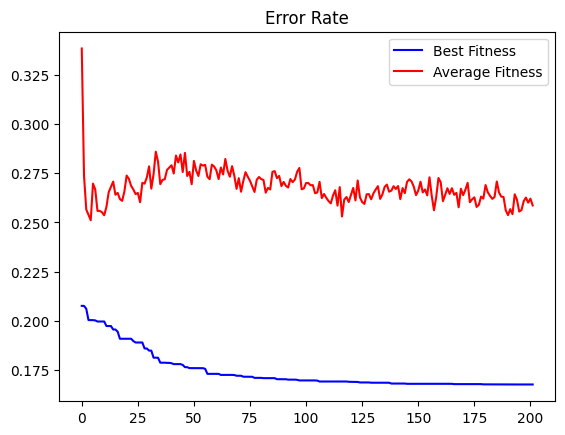

In [17]:
plotChapter(logbooks, "errRate", "Error Rate", "min")

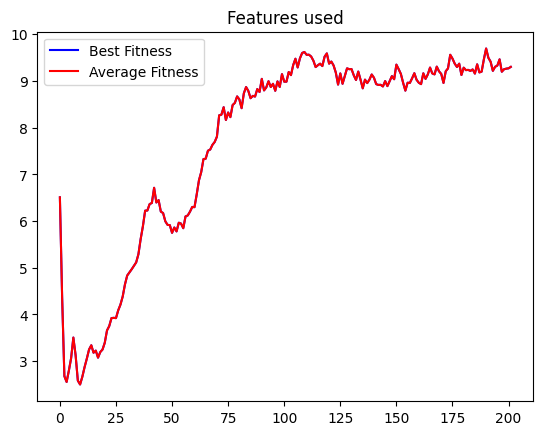

In [25]:
plotChapter(logbooks, "featUsed", "Features used", "avg")

## Best Individual

In [19]:
import textwrap

bestStatus = hof.items[0].phenotype
print("Best individual: \n", "\n".join(textwrap.wrap(bestStatus, 80)))
print("\nTraining Fitness: ", hof.items[0].fitness.values)

Best individual: 
 mul(sub(nf[2], sub(xor(not_(bf[13]), xor(greater_than(bf[2], not_(bf[1])),
xor(not_(or_(bf[5], xor(bf[4], not_(in_range(nf[1], bf[2], sub(xor(not_(bf[13]),
xor(bf[10], bf[13])), sub(nf[2], sub(sub(abs(nf[1]), sub(nf[2], -0.9059)),
not_(or_(bf[5], or_(bf[5], xor(bf[4], bf[0])))))))))))), bf[13]))), sub(nf[2],
sub(xor(not_(bf[13]), xor(bf[0], bf[13])), sub(nf[2], sub(sub(abs(swish(nf[1])),
sub(nf[2], swish(sub(1.8002, nf[0])))), nf[1])))))), sigmoid(swish(nf[6])))

Training Fitness:  (np.float64(0.16772860928826896), np.float64(0.9995473777767595))


In [20]:
trainAcc = accuracyFitness(hof.items[0], X_train, y_train)
print("Training Accuracy: ", trainAcc)

with open("best_individual.txt", "w+") as f:
    print(bestStatus, file=f)
    print("\nTraining Fitness: ", hof.items[0].fitness.values, file=f)
    print("\nTraining Accuracy: ", trainAcc, file=f)

Training Accuracy:  0.7467274890916303


### Confusion Matrix

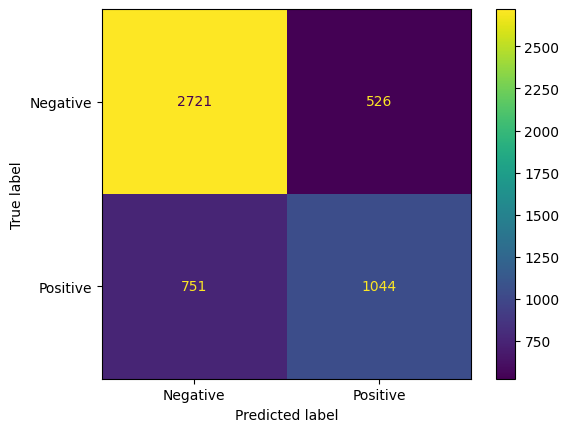

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_train, gePredict(hof.items[0], X_train[CONTINUOUS_FEATURES + ORDINAL_FEATURES].to_numpy(), X_train[BOOLEAN_FEATURES].to_numpy()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

disp.plot()

In [21]:
# training accuracy of the hall of fame

best = hof.items[0]
bestAcc = accuracyFitness(best, X_train, y_train)
for ind in mainHOF.items:
    try:
        acc = accuracyFitness(ind, X_train, y_train)
        print(acc, ind.fitness.values)
        
        if acc > bestAcc:
            best = ind
            bestAcc = acc
    except Exception as e:
        print(f"Skipping individual ({ind.fitness.values})")

0.7417691392304641 (np.float64(0.16978117466859743), np.float64(0.9995473777767595))
0.7461324871082904 (np.float64(0.17011931826007887), np.float64(0.9990889488055994))
0.7447441491471638 (np.float64(0.17018614593559384), np.float64(0.9995473777767595))
Skipping individual ((nan, nan))
0.7417691392304641 (np.float64(0.17037658033875025), np.float64(0.9995473777767595))
Skipping individual ((nan, nan))
Skipping individual ((nan, nan))
0.7417691392304641 (np.float64(0.17009310521576776), np.float64(0.9995473777767595))
0.7417691392304641 (np.float64(0.1705980273109586), np.float64(0.9997751832297667))
0.7417691392304641 (np.float64(0.17599148761085703), np.float64(0.9995473777767595))


### Predict

In [22]:
# test data 
testDf = pd.read_csv('test.csv')
testDf[CONTINUOUS_FEATURES] = stdScaler.transform(testDf[CONTINUOUS_FEATURES])
testDf[ORDINAL_FEATURES] = minMaxScaler.transform(testDf[ORDINAL_FEATURES])

X_test = testDf

nf = X_test[CONTINUOUS_FEATURES + ORDINAL_FEATURES].to_numpy()
bf = X_test[BOOLEAN_FEATURES].to_numpy()

res: list = gePredict(hof.items[0], nf, bf) # type: ignore

In [23]:
outputDf = pd.DataFrame(res, columns=["output"])
outputDf["index"] = outputDf.index

outputDf = outputDf[["index", "output"]]

outputDf.to_csv("submission.csv", index=False)

outputDf

,index,output
0,0,1
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
95799,95799,1
95800,95800,0
95801,95801,0
95802,95802,1
